In [2]:
import torch
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
import supervision as sv

In [3]:
DEVICE = 'cuda:0'
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = './SAM/sam_vit_h_4b8939.pth'

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH)
sam.to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)
print('model get')

model get


In [8]:
IMAGE_PATH = './dataset/test2.png'
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator()
detections = sv.Detections.from_sam(result)
annotated_image = mask_annotator.annotate(image_bgr, detections)
print(annotated_image.shape)
#

(270, 362, 3)


In [11]:
import matplotlib.pyplot as plt

cv2.imwrite('out.jpg',annotated_image)
# print(result.shape)

True

In [23]:
from model.Unet import pix2pix
path = './U_saved/final_save.pth'

model = pix2pix()
model = torch.load(path)

In [25]:
img = './dataset/1.jpg'
img2 = cv2.imread(img)

from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor()])

cv2.imwrite('./kyst.jpg',img2)

img = transform(img2)
img = img.unsqueeze(0)
model = model.cuda(2)
img = img.cuda(2)

print(img.shape)

output = model(img)
print(output.shape)

torch.Size([1, 3, 480, 640])
torch.Size([1, 1, 480, 640])


In [26]:
import numpy as np

output = output.cpu().detach().numpy()
output = np.squeeze(output)
output = (output * 255).astype(np.int32)

cv2.imwrite('out.jpg',output)


True

(480, 640)


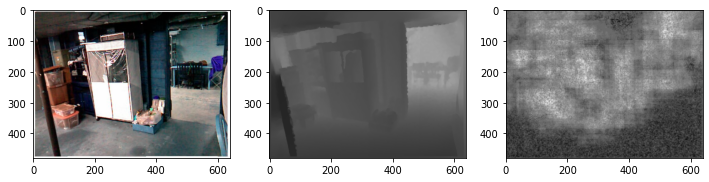

In [32]:
print(output.shape)
truth = cv2.imread('./dataset/1.png')
fig,axis = plt.subplots(1,3,figsize=(12,4))
axis[0].imshow(img2)
axis[1].imshow(truth)
axis[2].imshow(output, cmap ='gray')
plt.show()